Python code, explanation of thought process, any issues encountered

In [110]:
import pandas as pd

In [111]:
NEISS_df = pd.read_csv('NEISS2014.csv')

In [112]:
NEISS_df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative
0,141200216,10/23/14,63,99.704,M,21,Female,None listed,NaN,62,NaN,75,1,1,0,679,1807.0,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...
1,140117851,1/4/14,63,81.576,M,62,Female,White,NaN,57,NaN,79,1,1,0,1807,115.0,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...
2,150144993,8/17/14,63,99.704,M,21,Female,None listed,NaN,57,NaN,83,1,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT
3,150230176,7/27/14,63,99.704,M,30,Female,None listed,NaN,64,NaN,79,1,1,0,4076,NaN,30YOF TRYING TO GET OUT OF BED AND FELT A POP ...
4,141220717,9/8/14,63,99.704,M,16,Male,None listed,NaN,57,NaN,82,1,0,0,1893,NaN,16YOM HAD HAND SLAMMED IN A DOOR FRACTURED HAND


# Question 1

What are the top three body parts most frequently represented in this dataset?

What are the top three body parts that are least frequently represented?

In [113]:
bodyParts_df = pd.read_csv('BodyParts.csv')

In [114]:
bodyParts_df.head()

,BodyPart,Code
0,"Arm, lower",33
1,"Arm, upper",80
2,Ankle,37
3,Ear,94
4,Elbow,32


In [115]:
# The quickest way would be just use value_counts() on the body_part field and then check the values against
# the codes in the csv file

NEISS_df.body_part.value_counts()

75    9891
76    5786
92    5783
79    5717
31    3868
37    3781
35    3616
82    3369
83    3090
30    2675
33    2561
36    2239
34    2116
32    1612
85    1422
93    1280
88    1254
89    1080
77     847
94     782
81     756
80     745
0      549
87     390
38     286
84       4
Name: body_part, dtype: int64

In [116]:
# As this shows, 75, 76 and 92 are the most common body parts, and 84, 38 and 87 are the least common
# Consulting the csv file, these are head, face, and finger, and 25-50% of body, pubic region and not recorded
# Since not recorded doesn't really qualify, the next most common body part is 0, or internal

# For better reproducibility, I would merge the bodyparts csv file and do value_counts on that instead 

In [117]:
BP_NEISS_df = NEISS_df.merge(bodyParts_df, left_on='body_part', right_on='Code')

In [118]:
BP_NEISS_df.BodyPart.value_counts()[:3]

Head      9891
Face      5786
Finger    5783
Name: BodyPart, dtype: int64

In [119]:
# Most frequently represented 
# 1 Head
# 2 Face
# 3 Finger

In [120]:
BP_NEISS_df.BodyPart.value_counts(ascending=True)[:4]

25-50% of body      4
Pubic region      286
Not Recorded      390
Internal          549
Name: BodyPart, dtype: int64

In [121]:
# Least frequently represneted
# 1 25-50% of body
# 2 Pubic region
# 3 Internal

In [122]:
# As a precautionary measure, check for duplicate rows in NEISS, which may have affected these results
NEISS_df[NEISS_df.duplicated()].shape

(0, 18)

# Question 2

How many injuries in this dataset involve a skateboard?

Of those injuries, what percentage were male and what percentage were female?

What was the average age of someone injured in an incident involving a skateboard?

In [123]:
# Consulting the NEISS coding manual, there are two product codes relating to skateboards: 1333 and 5042
# 1333 is code for 'skateboards', while 5042 is code for 'scooters/skateboards, powered' and so may include skateboards

In [124]:
# I'll first get a count on how many records have either 1333 or 5042 product codes using this mask
mask = ((NEISS_df.prod1 == 1333) | (NEISS_df.prod1 == 5042) | (NEISS_df.prod2 == 1333) | (NEISS_df.prod2 == 5042))

In [125]:
len(NEISS_df[mask].index)

518

In [126]:
# There are 518 records with either 1333 or 5042 product codes
NEISS_df[mask].head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative
2,150144993,8/17/14,63,99.7040,M,21,Female,None listed,NaN,57,NaN,83,1,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT
39,140505206,4/25/14,63,81.5760,M,14,Male,White,NaN,57,NaN,33,1,0,0,1333,NaN,14YOM FELL WHILE SKATEBOARDING AND FRACTURED L...
135,141017208,7/29/14,14,50.1602,M,51,Male,Black/African American,NaN,57,NaN,37,1,4,0,5042,NaN,"51YOM PT C/O L ANKLE, KNEE APIN AND L ELBOW P..."
166,140851075,5/25/14,14,41.0402,M,14,Male,White,NaN,64,NaN,37,1,9,0,1842,1333.0,14YOM PT TRYING TO JUMP 5 STEPS ON A SKATEBOA...
292,140735930,7/13/14,90,5.7174,C,15,Female,White,NaN,62,NaN,75,1,0,0,1333,NaN,15 YOF FELL OFF A LONG BOARD & HIT HEAD- UNHEL...


In [127]:
# I am as yet unsure how many 5042 codes represent scooters and how many represent skateboards
# I will investigate further by examining narratives of products coded 5042 
mask2 = ((NEISS_df.prod1 == 5042) | (NEISS_df.prod2 == 5042))

In [128]:
NEISS_df[mask2].narrative

135      51YOM  PT C/O L ANKLE, KNEE APIN AND L ELBOW P...
1633     28 YOM FELL FROM MOTORIZED SCOOTER WHILE  GOIN...
3268     10 YOM STATES WAS RIDING *** SCOOTER NO HELMET...
5268        RT WRIST FX.69YOM FELL OFF MOTORIZED SCOOTER. 
7416     2 YOM PLAYING ON A MOTORIZED SCOOTER AND FELL ...
15509    12YOF FELL OFF A MOTORIZED SCOOTER AND INJURED...
15541    22YOM FELL OFF A SCOOTER IN THE STREET WHILE G...
19948    9YOM WAS RIDING A MOTORIZED SCOOTER AND CRASHE...
27875    63 YO FEMALE WHILE RIDING *** FELL INJ ARM . D...
32478    PT FELL FROM A SCOOTER. LACERATION FACE. 54 YOM* 
33248    5 YOF RIDING ELECTRIC SCOOTER, CRASHED WENT IN...
33992    6 YOF RIDING ELECTRIC SCOOTER WHEN FELL OFF AN...
34306    10YFC TRIPPED OVER AN ELECTRIC SCOOTER HITTING...
34395    51 YOF WAS RIDING MOTORIZED SCOOTER ON WET SID...
42734    14YMC ON A 3 WHEELED SCOOTER DOING SPINS FLEW ...
45097    26 YOM DX LT CLOSED FEMORA FX - S/P MOTOR/SCOO...
45620    48YOM WAS RIDING A SCOOTER IN THE STREET AND G.

In [129]:
# 5042 codes seem to relate more to electric scooters, with little mention of skateboards

In [130]:
# To examine further, I will search narratives of records with 5042 product codes for mention of the word 'skateboard'

In [131]:
len(NEISS_df[mask2][NEISS_df[mask2].narrative.str.contains('SKATEBOARD')].index)

0

In [132]:
# Not a single narrative of a record with a product coded 5042 contains the word 'skateboard'
# For that reason, the 1333 product code alone will be taken to mean skateboard for this analysis

In [133]:
# As a precautionary measure, I will investigate whether the word skateboard DOES show up in products coded 1333

In [134]:
mask3 = ((NEISS_df.prod1 == 1333) | (NEISS_df.prod2 == 1333))

In [135]:
len(NEISS_df[mask3][NEISS_df[mask3].narrative.str.contains('SKATEBOARD')].index)

465

In [136]:
# 465 records with product code 1333 have a narrative containing 'skateboard'
# To put this in perspective, I must see how many records in total contain a 1333 product code

In [137]:
len(NEISS_df[mask3].index)

495

In [138]:
# This means there are 30 records with a 1333 product code, but no mention of a skateboard in the narrative
# I'll examine these records more closely to try to explain why this might be so

In [139]:
NEISS_df[mask3][~NEISS_df[mask3].narrative.str.contains('SKATEBOARD')].narrative

292      15 YOF FELL OFF A LONG BOARD & HIT HEAD- UNHEL...
1360     20-YOM INVERTED L ANKLE WHILE LONGBOARDING. C/...
8724     9YOF SPRAINED WRIST FELL OFF HER SKATEBOAD ONT...
8897     DX ANKLE SPRAIN LT 22YOM PATIENT TWISTED LT AN...
8958     DX CHIN LAC 15YOM PATIENT LONG BOARDING DWN HI...
9373     8YOM  PT C/O L WRIST/HAND PAIN AFTER FALLING O...
16066    17 YOM NJURED AFTER FALLING OFF SKATEBAORD. DX...
17245    8YOF FELL ON OUTSTRETCHED ARM WHILE RIDING A *...
17888    DX RT UPPER EXT SKIN ABRASION 21YOM ROAD RASH ...
20239    16YOM PAIN TO HEAD WHEN FALL TO GROUND WHILE S...
20948    21 YO M, C/O ABSCESS ON RT CHEEK PT SCRAPED HI...
24197    16 YO M FELL WHILE LONGBOARDING. NOT WEARING P...
25137    9 YOM WAS WALKING UP A SKATE BOARD RAMP AND FE...
26994     20 YOM SPRAIN RT FOOT-FELL WHILE SKATE BOARDING 
27351    14 YOM WAS ON A LONGBOARD, & PUT HIS FOOT DOWN...
32131    16 YO WM LONGBOARDING SIMILIAR TO SKATE BOARD ...
38606    15YOM INJ.L.SHOULDER ON ROAD WHEN LONGBOARDING.

In [140]:
# Absence of 'skateboard' in these records seems to be explained by a mixture of typos, misspellings and 'longboard'
# Though longboards aren't strictly skateboards they will qualify as such for this analysis
# The NEISS manual may wish to consider adding longboard as a distinct product category with its own code in future

In [141]:
# Skateboards were involved in a total of 495 incidents
len(NEISS_df[mask3].index)

495

In [142]:
# Of those involved in skateboard-related accidents, 82% were male and 18% were female
NEISS_df[mask3].sex.value_counts(normalize=True)

Male      0.820202
Female    0.179798
Name: sex, dtype: float64

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

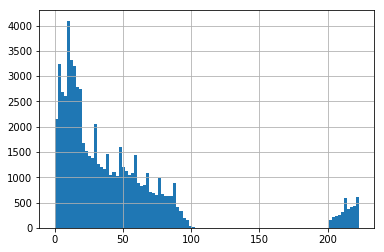

In [144]:
# As described in the NEISS coding manual, ages less than two years have been coded as months completed, preceded by
# a 2 e.g. 0 months completed = 200, 6 months completed = 206.
NEISS_df.age.hist(bins=100)

In [145]:
# This may prove problematic for this analysis. I will check if any records involved in skateboard accidents have been
# coded in this way
sorted(NEISS_df[mask3].age.unique())

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 52,
 64,
 71]

In [146]:
# Since the ages involved in this analysis have been coded normally I can proceed
# The average age of those involved in skateboard accidents is 17.9
NEISS_df[mask3].age.mean()

17.89090909090909

# Question 3

What diagnosis had the highest hospitalization rate? 

What diagnosis most often concluded with the individual leaving without being seen?

Briefly discuss your findings and any caveats you'd mention when discussing this data

In [147]:
# I will group by diagnosis and disposition
diagdisp_group = NEISS_df[['diag', 'disposition']].groupby(['diag', 'disposition'])['disposition'].count()

In [148]:
diagdisp_group

diag  disposition
41    1               403
      2                18
      4                56
      5                 5
      6                 1
42    1                57
      2                 2
      4                 5
      6                 2
46    1                25
47    1                17
      4                 2
48    1               336
      2                20
      4                29
      5                 2
      6                 5
49    1                82
      2                 1
      5                 1
      6                 2
50    1                88
      2                12
      4                20
      5                 3
      6                 2
51    1               443
      2                29
      4                27
      5                 3
                     ... 
66    4                 1
      5                 1
67    1                29
      4                 3
68    1               554
      2                18
      4             

In [149]:
# On examining Disposition.csv, admitted for hospitalization is coded as 4, though codes 2 and 5 could also denote
# hospitalization. For the purposes of this analysis, I will consider code 4 to denote hospitalization.
# Trying to use a generator to find each ratio could be troublesome, as not every diagnosis has dispositions of
# value 4. For that reason, I will use a loop through each diagnosis to find each ratio.

In [150]:
diags_lst = NEISS_df['diag'].drop_duplicates().values.tolist()

ratios_dict = {}

for i in diags_lst:
    if 4 in diagdisp_group[i]:
        buffer = 0
        for j in diagdisp_group[i]:
            buffer += j
    else: continue
    ratios_dict[i] = diagdisp_group[i][4] / buffer

In [151]:
# I will print out the ratios dict, find its maximum value, and then find that value in the dict to find which
# diagnosis it belongs to
ratios_dict

{41: 0.11594202898550725,
 42: 0.07575757575757576,
 47: 0.10526315789473684,
 48: 0.073979591836734693,
 50: 0.16,
 51: 0.052734375,
 52: 0.046822742474916385,
 53: 0.020383242532406538,
 55: 0.043522267206477734,
 56: 0.007874015748031496,
 57: 0.18602978941961992,
 58: 0.078651685393258425,
 59: 0.01503209555537499,
 60: 0.0079681274900398405,
 61: 0.085858585858585856,
 62: 0.11873350923482849,
 63: 0.02358490566037736,
 64: 0.0041642455936471041,
 65: 0.076470588235294124,
 66: 0.015625,
 67: 0.09375,
 68: 0.12154696132596685,
 69: 0.42592592592592593,
 71: 0.075492610837438426,
 72: 0.035608308605341248,
 74: 0.004830917874396135}

In [152]:
print(max(ratios_dict.values()))

0.425925925926


In [153]:
# This maximum ratio belongs to diagnosis code 69 which, looking at DiagnosisCodes.csv, denotes
# submersion (including drowning). It is by far the highest rate of hospitalization among the diagnoses.
# Though there is probably a much better and cleaner way of doing this!

In [154]:
# I will follow a similar procedure again to find which diagnosis most often led to patients leaving without being seen

In [155]:
left_dict = {}

for i in diags_lst:
    if 6 in diagdisp_group[i]:
        left_dict[i] = diagdisp_group[i][6]

In [156]:
left_dict

{41: 1,
 42: 2,
 48: 5,
 49: 2,
 50: 2,
 51: 10,
 52: 7,
 53: 52,
 55: 3,
 56: 10,
 57: 6,
 58: 12,
 59: 123,
 60: 4,
 62: 63,
 63: 7,
 64: 21,
 65: 3,
 68: 24,
 71: 257,
 72: 2,
 73: 1,
 74: 2}

In [157]:
max(left_dict.values())

257

In [158]:
# The most common diagnosis to leave without being treated is 71, which is other/not stated
# Since this does not qualify as a diagnosis proper, I will consider the next most common diagnosis
sorted(left_dict.values())

[1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 5,
 6,
 7,
 7,
 10,
 10,
 12,
 21,
 24,
 52,
 63,
 123,
 257]

In [159]:
# at 123 records, the diagnosis that left without being seen most often is diagnosis 59, which is laceration

In [160]:
# As mentioned, I'm sure there is a better way of going about these last two answers!

# Also, I may have misinterpreted the the second part of the question. The wording led me to believe that I was not
# being asked for a ratio, rather an absolute number. However, if I were to find a ratio, I would do it the same
# way I found the answer to the first part.

# It is possible that the two answers just found could be artefacts of differing sample sizes among diagnoses. As 
# illustrated in the group below, six diagnoses are much more common than the rest - 59, 53, 64, 57, 71, and 62. These
# represent 'laceration', 'contusions, abrasion', 'strain or sprain', 'burns, thermal (from flames or hot surface)',
# 'other/not stated', and 'internal organ injury' respectively. the fact that laceration is the most common diagnosis
# may explain why it is the diagnosis where patients most often leave without being seen. Likewise, the fact that only
# 54 cases of submersion (including drowning) are recorded in the dataset leaves it open to extreme results. Perhaps
# if a larger sample were analysed, the ratio of submersion patients being hospitalized may regress towards the mean.

In [161]:
NEISS_df.diag.value_counts()

59    12307
53    10646
64    10326
57     9735
71     8120
62     5306
52     1495
56     1270
55      988
68      724
63      636
58      534
51      512
41      483
74      414
48      392
72      337
60      251
61      198
65      170
54      149
50      125
49       86
42       66
66       64
69       54
73       35
67       32
46       25
47       19
Name: diag, dtype: int64

In [162]:
# In terms of the data itself, the biggest issues to get around are the ages coded in the 200s, and the weight field,
# which contains repeating values as shown below. Also, record 17829's age has obviously been encoded incorrectly as 0.

In [163]:
NEISS_df.weight.value_counts()

14.3089     12175
5.7174       9903
15.6716      9777
82.3076      8058
80.0213      6455
74.3851      5519
81.5760      4275
99.7040      3595
87.2960      1301
50.1602       907
89.7336       887
41.0402       808
112.1671      641
37.4149       560
6.6704        554
45.1442        51
56.4302        33
Name: weight, dtype: int64

# Question 4

In [164]:
# In order to use the age field properly, ages coded in the 200s will have to be recoded to 0 or 1 as appropriate

In [165]:
import numpy as np

In [166]:
zeroes = np.arange(200, 212)
ones = np.arange(212, 224)

In [167]:
NEISS_df.age.replace(to_replace=zeroes, value=0, inplace=True)
NEISS_df.age.replace(to_replace=ones, value=1, inplace=True)

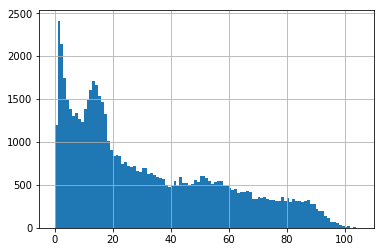

In [168]:
NEISS_df.age.hist(bins=105)

In [169]:
# I will merge diagnoses from DiagnosisCodes.csv so that the analysis is clear

In [170]:
diagnosis_df = pd.read_csv('DiagnosisCodes.csv')

In [171]:
DG_NEISS_df = NEISS_df.merge(diagnosis_df, left_on='diag', right_on='Code')

In [172]:
# Since I'm not looking for a specific information, I will investigate the relation between age and diagnosis among the
# the most common diagnoses. Their larger sample sizes should give more meaningful insights than other diagnoses.

In [173]:
# Owing to the uneven distribution of ages throughout the dataset, plotting line graphs of diagnosis frequencies
# across age will be distorted. For that reason I will plot freq of diagnosis / freq of age across age. This should
# give a clearer picture of any significant relationships.

In [174]:
# dataframe grouped by age and diagnosis
agediag_grp = DG_NEISS_df.groupby(['age', 'Diagnosis'])['Diagnosis'].count()
# sorted list of unique ages in DG_NEISS_df dataframe
ages_lst = sorted(DG_NEISS_df['age'].drop_duplicates().values.tolist())
# frequencies of each age in DG_NEISS_df
counts_lst = DG_NEISS_df.age.value_counts()

In [175]:
DG_NEISS_df.Diagnosis.value_counts()

Laceration                                                                                                                  12307
Contusions, Abrasions                                                                                                       10646
Strain or Sprain                                                                                                            10326
Fracture                                                                                                                     9735
Other/Not Stated                                                                                                             8120
Internal organ injury                                                                                                        5306
Concussions                                                                                                                  1495
Foreign body                                                                              

In [176]:
# 1 Laceration

In [177]:
ratios_lst = []

for age in ages_lst:
    if 'Laceration' in agediag_grp[age]:
        ratios_lst.append(agediag_grp[age]['Laceration'] / counts_lst[age])
    else:
        ratios_lst.append(0)

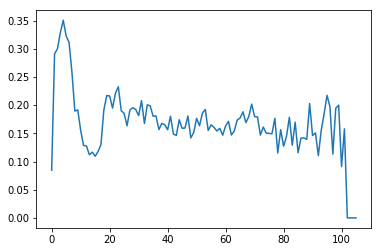

In [178]:
plt.plot(ages_lst, ratios_lst)

In [179]:
# 2 Contusions, Abrasions

In [180]:
ratios_lst = []

for age in ages_lst:
    if 'Contusions, Abrasions' in agediag_grp[age]:
        ratios_lst.append(agediag_grp[age]['Contusions, Abrasions'] / counts_lst[age])
    else:
        ratios_lst.append(0)

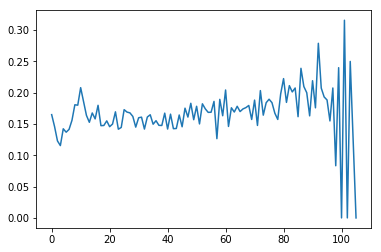

In [181]:
plt.plot(ages_lst, ratios_lst)

In [182]:
# 3 Strain or Sprain

In [183]:
ratios_lst = []

for age in ages_lst:
    if 'Strain or Sprain' in agediag_grp[age]:
        ratios_lst.append(agediag_grp[age]['Strain or Sprain'] / counts_lst[age])
    else:
        ratios_lst.append(0)

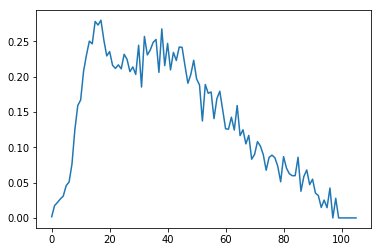

In [184]:
plt.plot(ages_lst, ratios_lst)

In [185]:
# 4 Fracture

In [186]:
ratios_lst = []

for age in ages_lst:
    if 'Fracture' in agediag_grp[age]:
        ratios_lst.append(agediag_grp[age]['Fracture'] / counts_lst[age])
    else:
        ratios_lst.append(0)

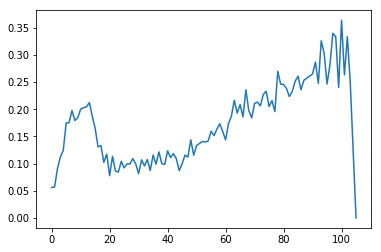

In [187]:
plt.plot(ages_lst, ratios_lst)

In [188]:
# 5 Other/Not Stated

In [189]:
ratios_lst = []

for age in ages_lst:
    if 'Other/Not Stated' in agediag_grp[age]:
        ratios_lst.append(agediag_grp[age]['Other/Not Stated'] / counts_lst[age])
    else:
        ratios_lst.append(0)

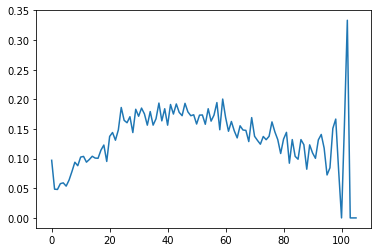

In [190]:
plt.plot(ages_lst, ratios_lst)

In [191]:
# 6 Internal organ injury

In [192]:
ratios_lst = []

for age in ages_lst:
    if 'Internal organ injury' in agediag_grp[age]:
        ratios_lst.append(agediag_grp[age]['Internal organ injury'] / counts_lst[age])
    else:
        ratios_lst.append(0)

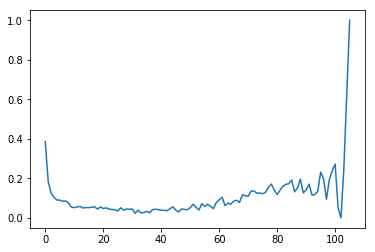

In [193]:
plt.plot(ages_lst, ratios_lst)

In [194]:
# Dealing with each of these plots in turn:

# laceration is overrepresented in toddlers, underrepresented in teenagers, and exhibits a steady downward trend
# throughout adulthood

# Contusions, Abrasions exhibits a slight yet steady increase from age 40 onwards

# Strain or Sprain shows a very clear trend. Incidence peaks in teenage years and becomes less common throughout adult
# life

# Fracture is more common among children than young adults, but becomes more and more common throughout adult life,
# peaking in old age

# Other/not stated diagnoses are most common among adults, and less common in the young and the old

# Internal organ injuries are overrepresented in toddlers, and become more common from the age of 50 onwards

In [195]:
# Looking at the rest of the diagnoses, one might assume that Aspirated foreign object and Ingested foreign object
# should be overrepresented among toddlers. To investigate, I will create two more plots.

In [196]:
# Aspirated foreign object

In [197]:
ratios_lst = []

for age in ages_lst:
    if 'Aspirated foreign object' in agediag_grp[age]:
        ratios_lst.append(agediag_grp[age]['Aspirated foreign object'] / counts_lst[age])
    else:
        ratios_lst.append(0)

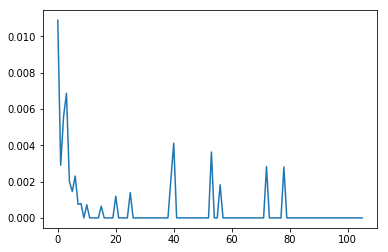

In [198]:
plt.plot(ages_lst, ratios_lst)

In [199]:
# Ingested foreign object

In [200]:
ratios_lst = []

for age in ages_lst:
    if 'Ingested foreign object' in agediag_grp[age]:
        ratios_lst.append(agediag_grp[age]['Ingested foreign object'] / counts_lst[age])
    else:
        ratios_lst.append(0)

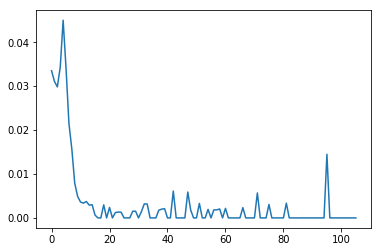

In [201]:
plt.plot(ages_lst, ratios_lst)

In [202]:
# These plots support the hypothesis. However, the quality of the visualisation as well as the certainty of the
# findings are affected by the low overall frequency of these diagnoses.

# Question 5

Investigate the data however you like and discuss any interesting insights you can find in the data

In [203]:
# What are the most common products involved?

In [204]:
NEISS_df.prod1.value_counts()

1842    5382
1807    5162
4076    2923
1205    2680
5040    2343
1211    2036
4074    1475
464     1427
1893    1375
1884    1326
4057    1318
3299    1300
611     1268
1267    1180
679      862
1817     663
1615     663
4078     657
5041     597
4056     524
1616     513
1233     504
1141     500
604      497
1333     490
1244     481
1871     470
1819     463
4014     426
3265     421
        ... 
843        1
235        1
905        1
713        1
1352       1
1319       1
967        1
1550       1
623        1
1687       1
883        1
567        1
1314       1
1557       1
1365       1
565        1
1734       1
820        1
212        1
4083       1
879        1
978        1
1393       1
1539       1
401        1
880        1
304        1
132        1
1903       1
1712       1
Name: prod1, Length: 667, dtype: int64

In [205]:
# 1842 and 1807 denote
# Stairs or steps (exlc. pull-down and folding stairs), and Floors and flooring materials

In [206]:
# 4076, 1205, 5040 and 1211 denote
#Beds/bedframes, Basketball(activity, apparel, equipment), Bicycles/accessories, Football(activity, apparel, equipment)

In [207]:
# Most commonly involved products are mundane, commonly used items

In [208]:
# What is the most deadly diagnosis?

In [209]:
filt = (NEISS_df.disposition == 8)

In [210]:
died_df = NEISS_df[filt]

In [211]:
died_df.diag.value_counts()

71    13
62     7
57     2
53     2
69     2
68     1
65     1
Name: diag, dtype: int64

In [212]:
# 71 - other/not stated is the most common diagnosis among patients who died, followed by 62, which denotes an internal
# organ injury. These are two of the most common diagnoses in the dataset, so in that way, it may not very surprising.

In [213]:
# What is the most deadly product?

In [214]:
died_df.prod1.value_counts()

1807    5
1842    3
5040    3
1866    2
1415    2
3277    2
1647    1
1403    1
3274    1
1439    1
1406    1
3287    1
4056    1
676     1
954     1
667     1
611     1
Name: prod1, dtype: int64

In [215]:
# product 1807, or floors and flooring materials is the most deadly product. However, this is one of the most commonly
# reported products. The small number of patients involved don't allow many conclusions to be drawn about which
# products/diagnoses are most deadly.